In [52]:
# 📦 Imports
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split, cross_val_predict
from sklearn.metrics import classification_report
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

df = pd.read_csv("ricardo_garcia_analysis.csv")
df.head()
df.drop(columns=['date','ticker'], inplace=True)

In [53]:
df.isna().sum()

disruptive_analysis_revenue            0
disruptive_analysis_rd_intensity       0
disruptive_analysis_margin_trend       0
disruptive_analysis_growth_rate        0
valuation_analysis_market_cap          0
valuation_analysis_margin_of_safety    0
llm_signal                             0
price_change_6m                        0
dtype: int64

In [54]:
X = df.drop(columns=['price_change_6m','disruptive_analysis_revenue'])
y = df['price_change_6m']
y.value_counts()

price_change_6m
 0.251588    367
-0.257153    367
 0.247826    366
 0.148643    183
 0.190920    108
            ... 
 1.963583      1
 0.042921      1
 0.049374      1
 0.007379      1
 0.254645      1
Name: count, Length: 303, dtype: int64

In [55]:
MMS = MinMaxScaler()

X_scaled = MMS.fit_transform(X)

In [56]:
# 🧠 Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

# 🌲 Base models
model = XGBRegressor(n_estimators=100, random_state=42)


In [63]:
param_grid = {
                'n_estimators':[400],
                'max_depth':[10],
                'learning_rate':[0.01],
            }

gs_model = GridSearchCV(model, param_grid, cv=6, verbose=3)
gs_model.fit(X_train, y_train)



Fitting 6 folds for each of 1 candidates, totalling 6 fits
[CV 1/6] END learning_rate=0.01, max_depth=10, n_estimators=400;, score=0.550 total time=   0.6s
[CV 2/6] END learning_rate=0.01, max_depth=10, n_estimators=400;, score=0.683 total time=   0.6s
[CV 3/6] END learning_rate=0.01, max_depth=10, n_estimators=400;, score=0.804 total time=   0.6s
[CV 4/6] END learning_rate=0.01, max_depth=10, n_estimators=400;, score=0.718 total time=   0.6s
[CV 5/6] END learning_rate=0.01, max_depth=10, n_estimators=400;, score=0.718 total time=   0.6s
[CV 6/6] END learning_rate=0.01, max_depth=10, n_estimators=400;, score=0.649 total time=   0.6s


GridSearchCV(cv=6,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, max_bin=None,
                                    max_cat_threshold=None,
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=100,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=42, ...),
             param_grid={'learning_rate': [0.01], 'max_depth': [10],
                         'n_estimators': [400]},
             verbose=3)

In [64]:
print(gs_model.best_params_)
print(gs_model.best_score_)

{'learning_rate': 0.01, 'max_depth': 10, 'n_estimators': 400}
0.6870479881509065


In [59]:
# Predict
y_pred = gs_model.predict(X_test)

In [66]:
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"R² Score: {r2:.4f}")

MAE: 0.0802
RMSE: 0.0539
R² Score: 0.6798


In [61]:
#save the model to a file
import joblib

joblib.dump(gs_model, "ml_model.pkl")

['ml_model.pkl']

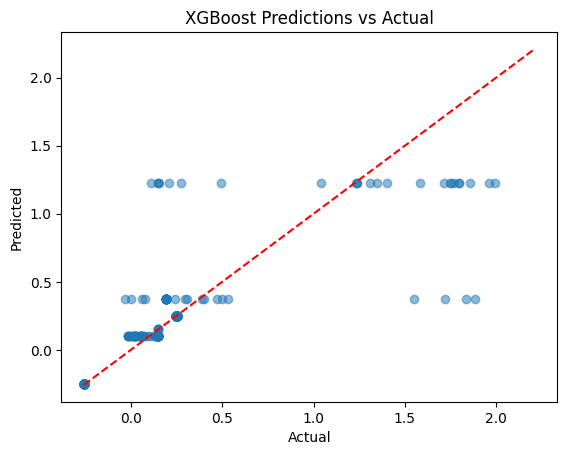

In [62]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("XGBoost Predictions vs Actual")
plt.show()